In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [82]:
np.random.seed(1)
x1 = np.random.randn(100)
x2 = 2 * x1**2 + 1 + np.random.randn(100)
y = np.random.choice([0,1],100)
x2[y==0] = x2[y==0] + 6 + 3*np.random.randn(len(x2[y==0]))
X = pd.DataFrame(np.c_[x1,x2], columns=['X1', 'X2'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

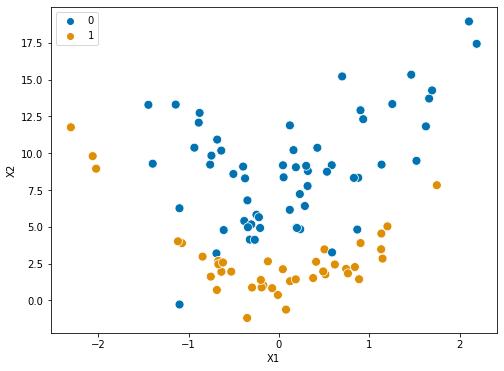

In [58]:
plt.figure(figsize=(8,6))
sb.scatterplot(X['X1'], X['X2'], s=80, hue=y, palette='colorblind')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [68]:
def plot_svc(svc, X1, X2, y, h=0.01, pad=0.25, support_point=True):
    x_min, x_max = X1.min()-pad, X1.max()+pad
    y_min, y_max = X2.min()-pad, X2.max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    sb.scatterplot(X1, X2, s=70, hue=y, palette="colorblind")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Support vectors indicated in plot by vertical lines
    if support_point==True:
        sv = svc.support_vectors_
        plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=30, linewidths='0.1')
        print('Number of support vectors: {}'.format(svc.support_.size))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

Accuracy: 0.9000
Number of support vectors: 44


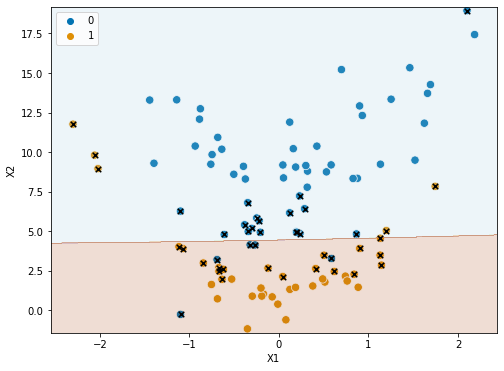

In [89]:
svm = SVC(C=1, kernel='rbf', gamma=0.01)
svm.fit(X, y)
print('Accuracy: {:.4f}'.format(svm.score(X, y)))
plot_svc(svm, X['X1'], X['X2'], y)

Accuracy: 0.8900
Number of support vectors: 38


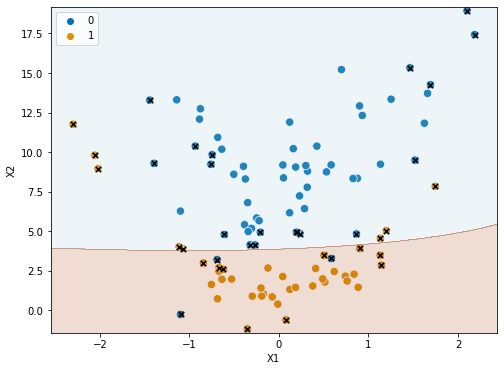

In [80]:
svm = SVC(C=1, kernel='rbf', gamma=0.1)
svm.fit(X, y)
print('Accuracy: {:.4f}'.format(svm.score(X, y)))
plot_svc(svm, X['X1'], X['X2'], y)

Accuracy: 0.9700
Number of support vectors: 52


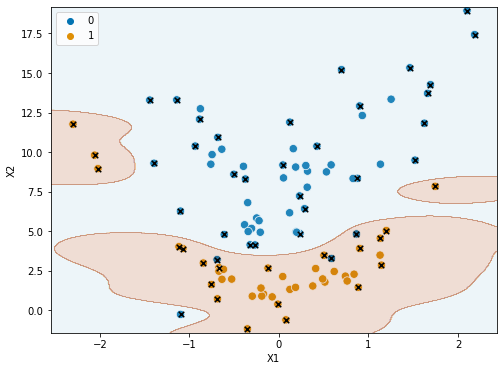

In [74]:
svm = SVC(C=1, kernel='rbf', gamma=1)
svm.fit(X, y)
print('Accuracy: {:.4f}'.format(svm.score(X, y)))
plot_svc(svm, X['X1'], X['X2'], y)

Accuracy: 0.7900
Number of support vectors: 44


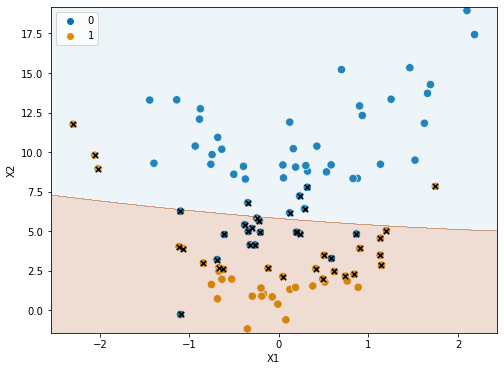

In [75]:
svm = SVC(C=1, kernel='poly', degree=2)
svm.fit(X, y)
print('Accuracy: {:.4f}'.format(svm.score(X, y)))
plot_svc(svm, X['X1'], X['X2'], y)

Accuracy: 0.7900
Number of support vectors: 49


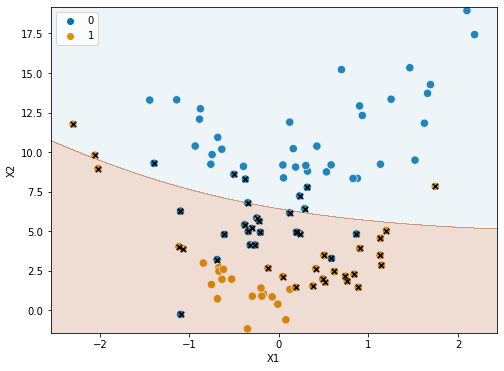

In [78]:
svm = SVC(C=1, kernel='poly', degree=3)
svm.fit(X, y)
print('Accuracy: {:.4f}'.format(svm.score(X, y)))
plot_svc(svm, X['X1'], X['X2'], y)

In [83]:
def display_roc(model, X_train, X_test, y_train, y_test, label, type='train'):

    model.fit(X_train, y_train)
    y_train_pred = model.decision_function(X_train)
    y_test_pred = model.decision_function(X_test)

    false_pos_train, true_pos_train, threshold_train = roc_curve(y_train, y_train_pred)
    false_pos_test, true_pos_test, threshold_test = roc_curve(y_test, y_test_pred)

    auc_train = auc(false_pos_train, true_pos_train)
    auc_test = auc(false_pos_test, true_pos_test)

    if type=='train':
        plt.plot(false_pos_train, true_pos_train, label = label + ' (AUC = {:.2f})'.format(auc_train))
    else:
        plt.plot(false_pos_test, true_pos_test, label = label + ' (AUC = {:.2f})'.format(auc_test))

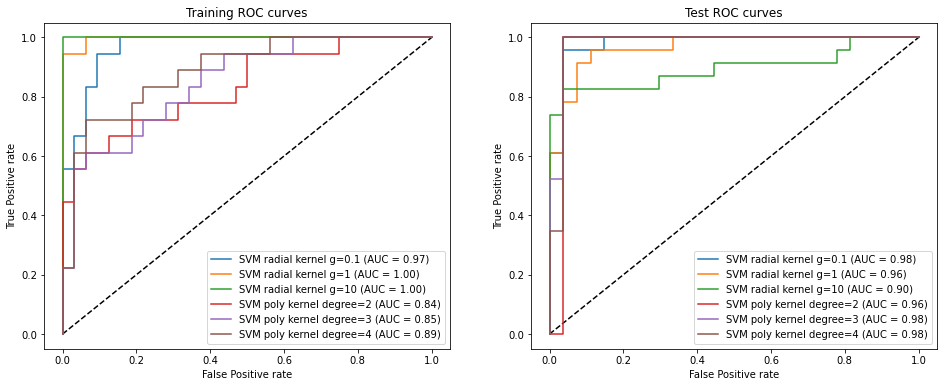

In [87]:
svm1 = SVC(C=1, kernel='rbf', gamma=1)
svm2 = SVC(C=1, kernel='rbf', gamma=0.1)
svm3 = SVC(C=1, kernel='poly', degree=2)
svm4 = SVC(C=1, kernel='poly', degree=3)
svm5 = SVC(C=1, kernel='rbf', gamma=10)
svm6 = SVC(C=1, kernel='poly', degree=4)


plt.figure(figsize=(16,6))

plot_1 = plt.subplot(1,2,1)
plt.plot(np.linspace(0,1), np.linspace(0,1), '--', c='k')
display_roc(svm2, X_train, X_test, y_train, y_test, 'SVM radial kernel g=0.1', type='train')
display_roc(svm1, X_train, X_test, y_train, y_test, 'SVM radial kernel g=1', type='train')
display_roc(svm5, X_train, X_test, y_train, y_test, 'SVM radial kernel g=10', type='train')
display_roc(svm3, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=2', type='train')
display_roc(svm4, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=3', type='train')
display_roc(svm6, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=4', type='train')

plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Training ROC curves')
plt.legend()

plot_2 = plt.subplot(1,2,2)
plt.plot(np.linspace(0,1), np.linspace(0,1), '--', c='k')
display_roc(svm2, X_train, X_test, y_train, y_test, 'SVM radial kernel g=0.1', type='test')
display_roc(svm1, X_train, X_test, y_train, y_test, 'SVM radial kernel g=1', type='test')
display_roc(svm5, X_train, X_test, y_train, y_test, 'SVM radial kernel g=10', type='test')
display_roc(svm3, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=2', type='test')
display_roc(svm4, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=3', type='test')
display_roc(svm6, X_train, X_test, y_train, y_test, 'SVM poly kernel degree=4', type='test')

plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Test ROC curves')
plt.legend()

plt.show()